# Project Number 5

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\arkay\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data=pd.read_csv('pima.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df=pd.DataFrame(data=data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Univariate Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x2378f17f7c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2378f19dd48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2378f18a888>],
 'medians': [<matplotlib.lines.Line2D at 0x2378f1ac9c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2378f196408>],
 'means': []}

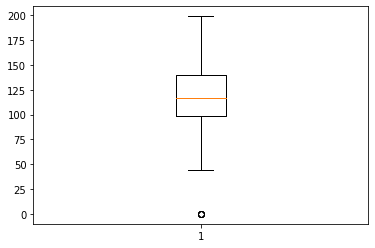

In [6]:
plt.boxplot(df['Glucose'])

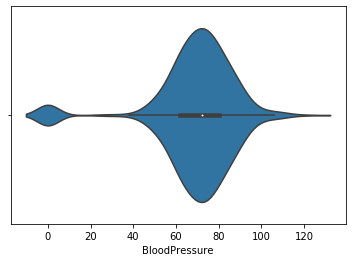

In [7]:
sns.violinplot(x='BloodPressure',data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x2378f2dcd88>,
 'caps': [<matplotlib.lines.Line2D at 0x2378f2e0e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2378f2ca908>],
 'medians': [<matplotlib.lines.Line2D at 0x2378f2e3f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2378f2e8848>],
 'means': []}

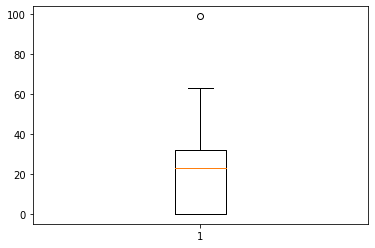

In [8]:
plt.boxplot(df['SkinThickness'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2378f345c08>,
 'caps': [<matplotlib.lines.Line2D at 0x2378f34ab88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2378f335ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x2378f34fb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2378f34fc08>],
 'means': []}

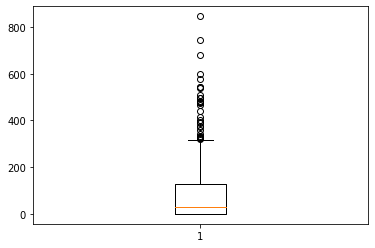

In [9]:
plt.boxplot(df['Insulin'])

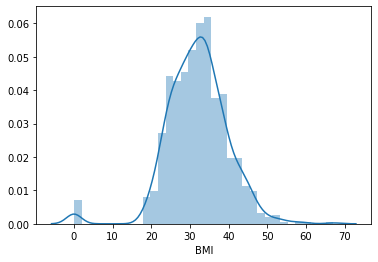

In [10]:
sns.distplot(df['BMI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2378f481b88>,
 'caps': [<matplotlib.lines.Line2D at 0x2378f485b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2378f4708c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2378f489ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2378f489bc8>],
 'means': []}

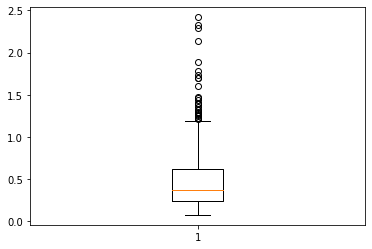

In [11]:
plt.boxplot(df['DiabetesPedigreeFunction'])

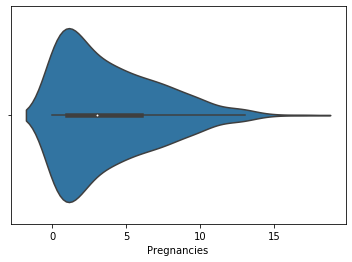

In [12]:
sns.violinplot(x='Pregnancies',data=df)

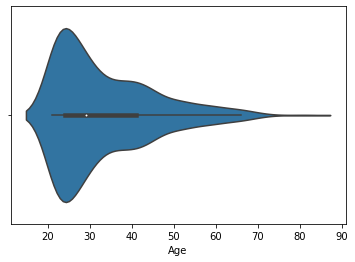

In [13]:
sns.violinplot(x='Age',data=df)

# Bivariate Analysis

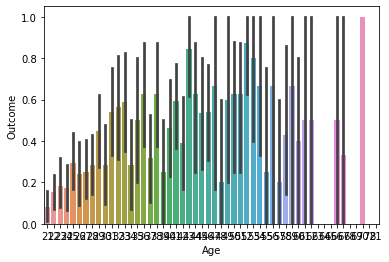

In [14]:
sns.barplot(x='Age',y='Outcome',data=df)

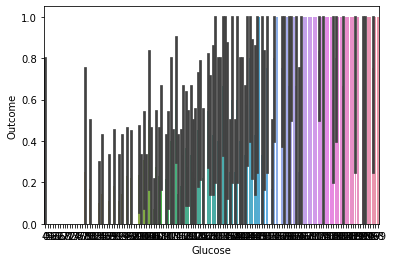

In [15]:
sns.barplot(x='Glucose',y='Outcome',data=df)

In [16]:
x=df['Insulin']
y=df['Outcome']

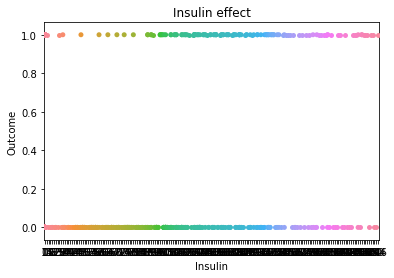

In [17]:
ax=sns.stripplot(x,y)
ax.set(xlabel='Insulin',ylabel='Outcome')
plt.title('Insulin effect')
plt.show()

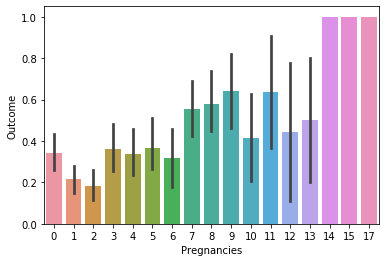

In [18]:
sns.barplot(x='Pregnancies',y='Outcome',data=df)

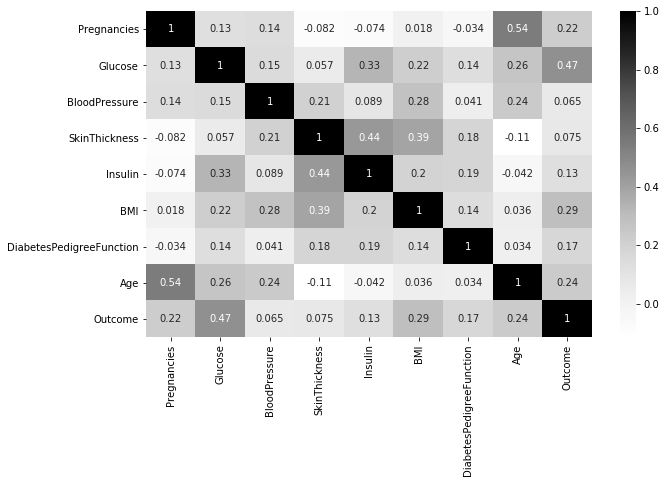

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Greys',annot=True)

# Data Cleaning

In [20]:
z=np.abs(zscore(df))
z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [21]:
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [65]:
df1_new=df[(z<3).all(axis=1)]
df1_new.shape

(688, 9)

In [66]:
df1_new.skew()

Pregnancies                 0.814931
Glucose                     0.574478
BloodPressure               0.133396
SkinThickness              -0.079466
Insulin                     1.252364
BMI                         0.374415
DiabetesPedigreeFunction    1.181635
Age                         1.047105
Outcome                     0.724938
dtype: float64

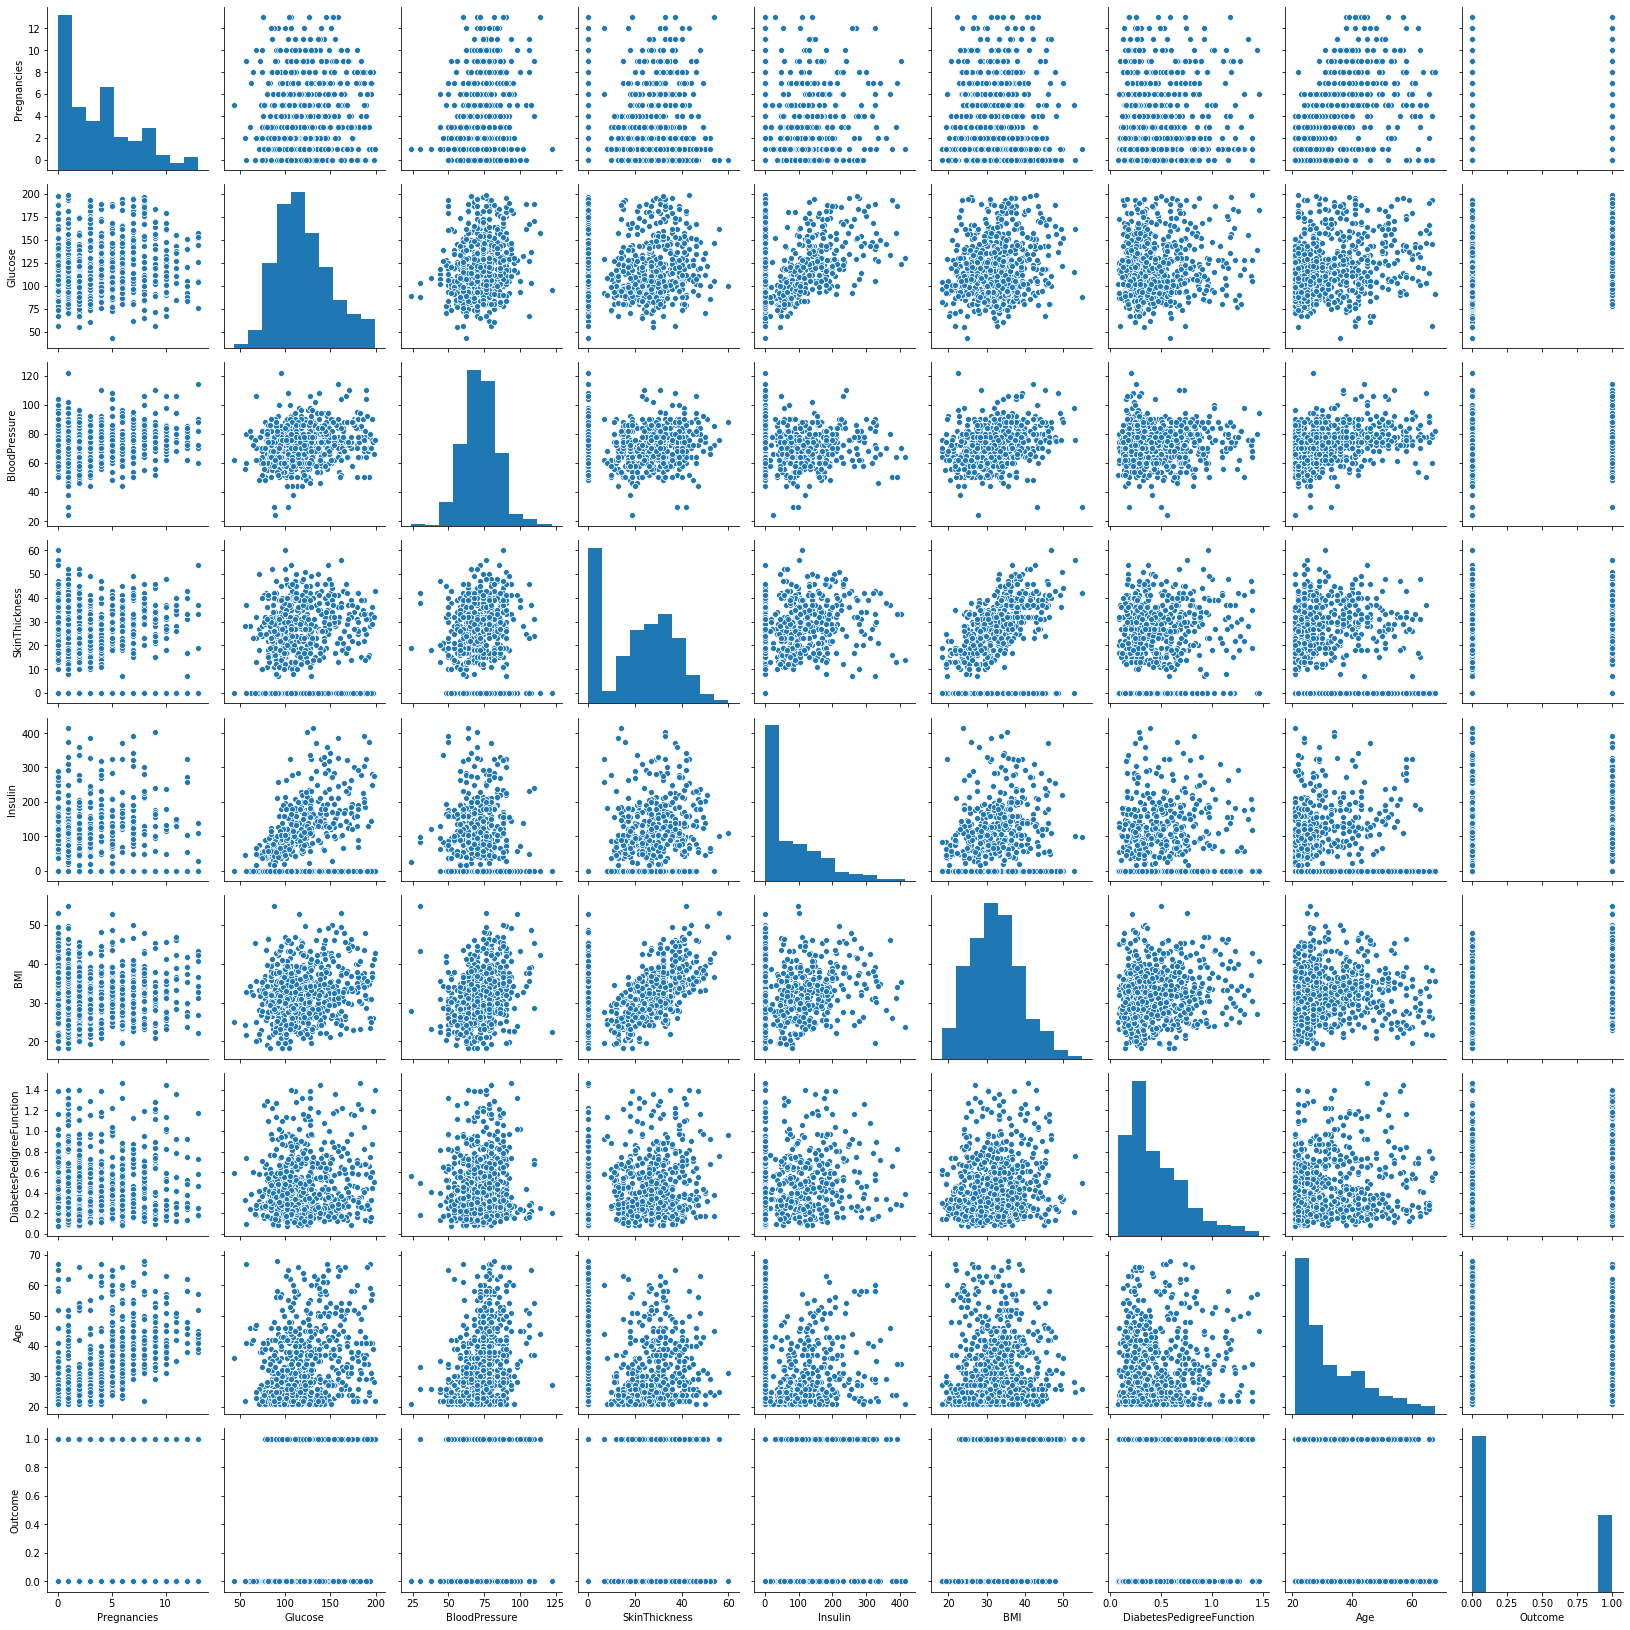

In [67]:
sns.pairplot(df1_new)

# Data Preprocessing for Model Traning 

In [70]:
x=df1_new.iloc[:,0:-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [71]:
y=df1_new.iloc[:,-1]
y.head()
# independant input variables

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [72]:
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum accuracy score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.7971014492753623
accuracy score correspondng to random state 42 is: 0.7584541062801933
accuracy score correspondng to random state 43 is: 0.7729468599033816
accuracy score correspondng to random state 44 is: 0.7294685990338164
accuracy score correspondng to random state 45 is: 0.7294685990338164
accuracy score correspondng to random state 46 is: 0.7584541062801933
accuracy score correspondng to random state 47 is: 0.782608695652174
accuracy score correspondng to random state 48 is: 0.748792270531401
accuracy score correspondng to random state 49 is: 0.7729468599033816
accuracy score correspondng to random state 50 is: 0.7101449275362319
accuracy score correspondng to random state 51 is: 0.7971014492753623
accuracy score correspondng to random state 52 is: 0.782608695652174
accuracy score correspondng to random state 53 is: 0.7971014492753623
accuracy score correspondng to random state 54 is: 0.8115942028985508
accuracy score correspo

# Model Training with Various Algorithms

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=0.3)

Logistic Regression

In [74]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
score=accuracy_score(y_test,pred)
matrix=confusion_matrix(y_test,pred)
report=classification_report(y_test,pred)
pred=lg.predict(x_test)
print(score)
print(matrix)
print(report)
print(pred)
print('\n')

0.8309178743961353
[[133  10]
 [ 25  39]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       143
           1       0.80      0.61      0.69        64

    accuracy                           0.83       207
   macro avg       0.82      0.77      0.79       207
weighted avg       0.83      0.83      0.82       207

[0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]




Cross Validating Logistic Regression 

In [38]:
cvs=cross_val_score(lg,x,y,cv=10)
print(cvs)
print(cvs.mean())

[0.69565217 0.8115942  0.76811594 0.76811594 0.7826087  0.72463768
 0.72463768 0.86956522 0.75       0.79411765]
0.7689045183290708


Checking Model Performance using other Algorithms

In [39]:
model= [DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),LogisticRegression()]

In [40]:
for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    Pred=i.predict(x_test)
    AS=accuracy_score(y_test,Pred)
    cvs=cross_val_score(i,x,y,cv=10,scoring='accuracy').mean()
    print('accuracy score of',i,'is:',AS)
    print(AS)
    print(confusion_matrix(y_test,Pred))
    print(classification_report(y_test,Pred))
    print(cvs)
    print('\n')

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.7101449275362319
0.7101449275362319
[[112  31]
 [ 29  35]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       143
           1       0.53      0.55      0.54        64

    accuracy                           0.71       207
   macro avg       0.66      0.67      0.66       207
weighted avg       0.71      0.71      0.71       207

0.6963554987212277


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamm

In [41]:
dtc=DecisionTreeClassifier()
param_grid={'criterion':['ginni','entropy']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=5)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.7181423886596848
{'criterion': 'entropy'}


In [42]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.6956521739130435
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       143
           1       0.51      0.44      0.47        64

    accuracy                           0.70       207
   macro avg       0.64      0.62      0.63       207
weighted avg       0.68      0.70      0.69       207



In [44]:
svc=SVC()
param_grid={'kernel':['rbf','poly','linear']}
grid=GridSearchCV(svc,param_grid,scoring='accuracy',cv=5)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.7820480270813499
{'kernel': 'linear'}


In [45]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8309178743961353
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       143
           1       0.84      0.56      0.67        64

    accuracy                           0.83       207
   macro avg       0.83      0.76      0.78       207
weighted avg       0.83      0.83      0.82       207



In [47]:
cvs=cross_val_score(svc,x,y,cv=10)
print(cvs)
print(cvs.mean())

[0.75362319 0.82608696 0.76811594 0.7826087  0.73913043 0.76811594
 0.75362319 0.84057971 0.77941176 0.82352941]
0.7834825234441601


Boosting the Model to Improve Model Performance

In [48]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
predrf=rf.predict(x_test)
rf.score(x_train,y_train)


1.0

In [50]:
predrf

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Saving The Model

In [51]:
joblib.dump(rf,'rfpima.obj')

['rfpima.obj']